<a href="https://colab.research.google.com/github/NickPetrilli/AI/blob/main/lab09_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 09
#### By R. Coleman
The goal of this lab is to explore convolutional neural networks
for the MNIST data.

### Background
CNNs are a class of so-called "deep learning" networks that have been shown to be very effective for certain types of problems, particularly those involving
computer vision. However, we pay a price for this capability in complexity.

In fact, CNNs are really two just types of networks that are stacked and interconnected.
The first component which receives input from the source is for feature learning. It is in turn to the second
component which resembles the garden variety feedforward multilayer
perceptron which generates the output. This whole ensemble gets trained using the usual learning
algorithm which is typically backpropagation. That's it.

Now, because of this complexity, this part of the lab has you mainly walk
through the codes and discussion about them
that I have put together with some help from ChatGPT.
Read the cells and make sure you understand completely what is going on with them. If you have questions, ask ChatGPT, put them in the discussion as with associated with this lab, or bring the questions to class and we'll try to clarify them.

However, you will have to make some changes to the very last cell so that
different students get to observe different MNIST images.

To start, copy this notebook then study and run the cells, step-by-step, then make changes to the last step.

At the bottom of this notebook you will find the delivery instructions.

---



In [ ]:
# Step 1: Dataset Preparation
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


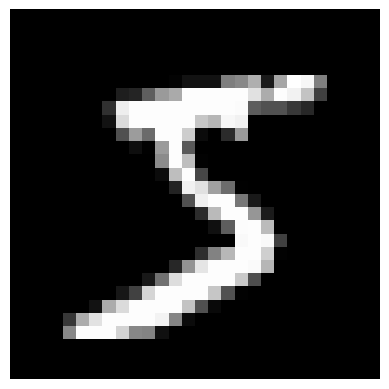

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Step 2: Data Preprocessing
# Reshape input images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert pixel values to float and normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In the statement `X_train = X_train.reshape(-1, 28, 28, 1)`, `X_train` is being reshaped to a new shape. Let's break down the components of this statement:

- `X_train`: It represents the training data, which is a NumPy array containing images.

- `reshape()`: It is a function in NumPy used to change the shape of an array. Here, it is used to reshape `X_train` to a new shape.

- `-1`: The use of `-1` as one of the dimensions in the reshape function is a placeholder that allows NumPy to automatically calculate the value based on the other dimensions. In this case, it is used to determine the number of samples in the dataset.

- `28, 28, 1`: These dimensions specify the desired shape of each sample in the dataset after reshaping. In this case, it represents images with a height and width of 28 pixels and a single channel (grayscale image).

By reshaping `X_train` using `X_train.reshape(-1, 28, 28, 1)`, the dataset is transformed into a 4-dimensional array. The first dimension, determined by the `-1` placeholder, represents the number of samples in the dataset. The following dimensions represent the height, width, and number of channels of each image.

This reshape operation is often required when working with convolutional neural networks (CNNs) in Keras or other deep learning frameworks, as they typically expect input data in the form of multi-dimensional arrays.

The difference between the `(28, 28)` shape and the `(28, 28, 1)` shape is in the number of dimensions and the interpretation of the data.

1. `(28, 28)` shape:
   - This shape represents a 2-dimensional array.
   - Each element in the array represents a single pixel intensity value.
   - This shape is typically used to represent grayscale images where each pixel is a single value representing the intensity level.

2. `(28, 28, 1)` shape:
   - This shape represents a 3-dimensional array.
   - The first two dimensions, `(28, 28)`, still represent the spatial dimensions of the image.
   - The additional dimension, `1`, represents the number of channels.
   - In the context of image data, the channel dimension typically represents the color channels of the image.
   - In this case, the value `1` indicates that the image is grayscale, as it only has one channel (intensity channel).

The additional channel dimension `(28, 28, 1)` is often required when working with convolutional neural networks (CNNs) or deep learning frameworks that expect input data in the form of multi-dimensional arrays. CNNs typically work with images represented as 3D arrays, where the third dimension corresponds to color channels, even if the image is grayscale.

By using `(28, 28, 1)` instead of `(28, 28)`, the data retains its spatial information and is compatible with CNNs that expect input in the form of 3D arrays.

In [ ]:
# Step 3: Model Architecture
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# These are the feature learning components.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# These are the MLP learning components
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In the statement `model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))`, a Conv2D layer is being added to a Keras model. Let's break down the components of this statement:

- `model`: It represents the Keras model to which the Conv2D layer is being added.

- `add()`: It is a method in Keras used to add layers to a model.

- `Conv2D()`: It is a class representing a 2D convolutional layer in Keras.

- `32`: This parameter represents the number of filters (also known as kernels) used in the convolutional layer. Each filter learns different patterns or features from the input data.

- `(3, 3)`: This parameter specifies the spatial dimensions of each filter. In this case, it is a 3x3 filter.

- `activation='relu'`: This parameter specifies the activation function applied to the output of the Conv2D layer. Here, the Rectified Linear Unit (ReLU) activation function is used, which helps introduce non-linearity to the model.

- `input_shape=(28, 28, 1)`: This parameter defines the shape of the input data expected by the Conv2D layer. In this case, the input shape is specified as (28, 28, 1), indicating that the input should be a 3D array with dimensions (height, width, channels). The `1` represents the number of channels, indicating that the input data is grayscale (single-channel).

By adding this Conv2D layer to the model, the model learns to extract 32 different features from the input data using 3x3 filters. The ReLU activation function introduces non-linearity to the output of the layer. The input shape is specified as (28, 28, 1) to ensure compatibility with the input data.

Note that this is just one example of adding a Conv2D layer to a model, and the parameters can be adjusted based on the specific requirements of the model architecture.

When there are 32 filters in a Conv2D layer, each filter is independent and learns its own set of weights. The filters are not directly related to one another in terms of their weights or parameters.

Each filter in the Conv2D layer is responsible for learning and detecting different patterns or features in the input data. By using multiple filters, the model can capture a diverse range of features at different spatial locations within the input.

During the convolution operation, each filter slides or convolves over the input data, performing a dot product between its weights and the corresponding receptive field in the input. The output of each filter is a 2D activation map, also known as a feature map, highlighting the regions in the input where the learned pattern or feature is detected.

It's worth noting that the filters in a Conv2D layer can overlap spatially, depending on the stride value. The stride determines the step size of the filter as it moves across the input. By default, the stride is set to 1, which means the filter moves one pixel at a time horizontally and vertically. However, the filters in a Conv2D layer do not share weights or information with one another.

Overall, the purpose of having multiple filters in a Conv2D layer is to enable the model to learn a diverse set of features and capture complex patterns in the input data.

Each filter in a Conv2D layer is initialized uniquely, and the purpose of having multiple filters, such as 32 in this case, is to capture a diverse set of features across the entire input.

While it is true that the filters cover the same spatial areas of the receptive field, each filter learns different weights during the training process. These learned weights enable the filters to capture different patterns or features in the input data.

The reason for using multiple filters is to allow the model to learn a variety of features at different spatial locations. Each filter specializes in detecting a particular pattern or feature, and by using multiple filters, the model becomes capable of capturing a wide range of patterns present in the input.

By having 32 filters, the model has the capacity to learn 32 different types of features from the input data. These features can include edges, textures, shapes, or any other relevant patterns depending on the problem being solved.

So, although the spatial areas of the receptive field may be the same for each filter, the unique weights learned by each filter result in the extraction of different features. The use of multiple filters enhances the model's ability to capture complex patterns and improve its overall representation and understanding of the input data.

The filters in a Conv2D layer are initialized with random values, so it is not possible to provide specific examples of unique filters without knowing the specific random initialization values used during training. However, I can provide some general examples of types of filters that are commonly learned by Conv2D layers:

1. Edge Detection Filter: This filter is designed to detect edges and sharp transitions in the input. It can capture horizontal, vertical, or diagonal edges depending on its learned weights.

2. Blur Filter: A blur filter smooths out the input by averaging neighboring pixel values. It is commonly used to reduce noise or extract general features in the image.

3. Corner Detection Filter: This filter is sensitive to corners or junctions in the input. It can detect regions where intensity changes occur in multiple directions.

4. Line Detection Filter: Line detection filters specialize in detecting straight lines of various orientations in the input. They respond strongly to regions containing lines.

5. Texture Detection Filter: Texture detection filters focus on capturing repetitive patterns or textures in the input. They respond strongly to areas with consistent patterns.

These are just a few examples of the types of filters that Conv2D layers can learn. During the training process, the network learns the optimal weights for these filters to extract meaningful features from the input data. The specific learned filters will depend on the dataset, model architecture, and training process.

In [ ]:
# Step 4: Model Compilation and Training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
# validation_split = 0.1 means take 10% of the training data for validation
# So training set will have around 54,000 and validation set will have 6,000
# Used to prevent overfitting

Epoch 1/5
1688/1688 [==============================] - 53s 31ms/step - loss: 0.1565 - accuracy: 0.9526 - val_loss: 0.0694 - val_accuracy: 0.9818
Epoch 2/5
1688/1688 [==============================] - 53s 31ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0432 - val_accuracy: 0.9888
Epoch 3/5
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.0410 - val_accuracy: 0.9872
Epoch 4/5
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0266 - accuracy: 0.9910 - val_loss: 0.0345 - val_accuracy: 0.9903
Epoch 5/5
1688/1688 [==============================] - 53s 31ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0327 - val_accuracy: 0.9908


The diagnostic output from the `fit()` step provides information about the training progress and performance of the model. Let's break down the values in the output:

- `Epoch 1/5`: Indicates the current epoch out of the total number of epochs. In this case, it is the first epoch out of 5.

- `1688/1688`: Represents the number of batches processed in the current epoch. In this example, there are 1688 batches in total.

- `[==============================]`: A visual representation of the progress bar, indicating the progress of the current epoch's training.

- `60s 34ms/step`: The time taken to process each batch and the average time per step (batch) during the training.

- `loss: 0.1472`: The value of the loss function (in this case, sparse categorical cross-entropy) calculated on the training data for the current epoch. Lower values indicate better performance.

- `accuracy: 0.9549`: The training accuracy achieved by the model on the training data for the current epoch. This represents the percentage of correctly classified samples.

- `val_loss: 0.0510`: The value of the loss function calculated on the validation data for the current epoch. The validation loss provides an indication of how well the model is generalizing to unseen data. Lower values indicate better generalization.

- `val_accuracy: 0.9853`: The validation accuracy achieved by the model on the validation data for the current epoch. This represents the percentage of correctly classified samples in the validation set.

In summary, the diagnostic output shows the progress of the training process by providing information about the loss, accuracy, and validation metrics at each epoch. It helps you monitor the model's performance and identify any issues during training, such as overfitting or underfitting.

In [ ]:
# Step 5: Model Evaluation
# How well does the model do on data its never seen before
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0334 - accuracy: 0.9906
Test Loss: 0.033429667353630066
Test Accuracy: 0.9905999898910522


313/313 [==============================] - 3s 9ms/step


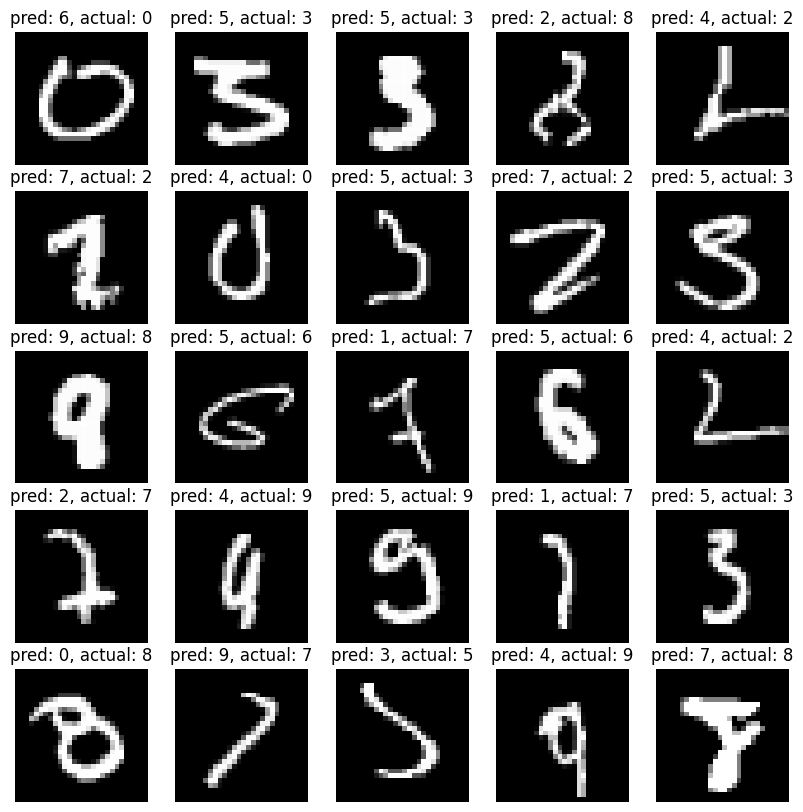

In [ ]:
# Step 6: Predictions
# Change this cell so that the specific 25 predictions and plots show similar
# to the ones below in the output which I've in place here.
# You can run this cell and it should reproduce these results
# TODOs:
# A) the predicted label (the code already does this!)
# B) the actual (or 'act') label ONLY when the prediction is wrong.
# C) the starting index is the last two digits of your student id.
# D) output ONLY the first 25 where the prediction is wrong.
# Do these tasks in the best possible way that maximizes clarity of output.
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

actual_labels = y_test

# Optional: Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

starting_index = 23
counter = 0;
# The i index will be the last two digits of your college id.
for i in range(starting_index, len(X_test)):
  if (predicted_labels[i] != actual_labels[i]):
    plt.subplot(5, 5, counter + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'pred: {predicted_labels[i]}, actual: {actual_labels[i]}')
    plt.axis('off')
    counter += 1
  if (counter == 25):
    break
plt.show()

---
### Deliverables
1. Share the copied notebook as viewable only. *Do not remove the outputs.* Copy the link and paste it into the assignment shell.
2. Complete the [submission flight checklist](https://docs.google.com/spreadsheets/u/0/d/1lgCttHGUIbCUTrd0TZIm4Nxfy8wy3jnIvNv7cUPJ-Gw/edit).
When done, export the checklist as lab04-checklist.pdf, and upload it to the assignment shell.